# Importing neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

In [3]:
!pip install opencv_python

^C


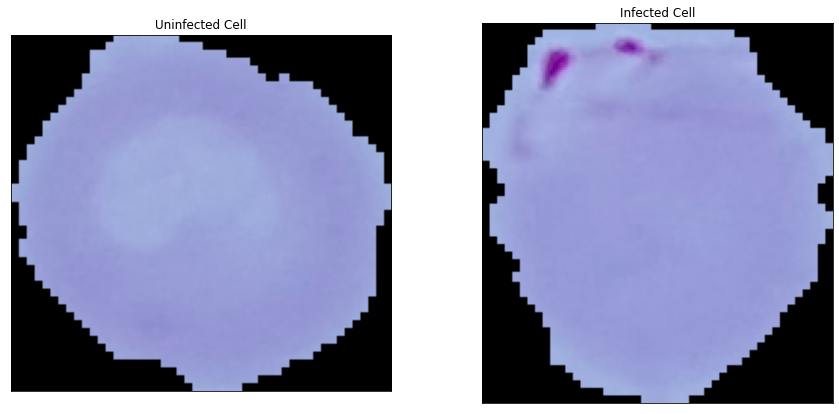

In [3]:
import cv2

upic='D:/malaria data/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='D:/malaria data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [4]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [6]:
trainDatagen = datagen.flow_from_directory(directory='D:/malaria data/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
valDatagen = datagen.flow_from_directory(directory='D:/malaria data/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# Preparing the model

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [12]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

C:\Users\soura\AppData\Local\Temp\ipykernel_31292\3717032350.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


Epoch 1/20
1378/1378 [==============================] - 672s 486ms/step - loss: 0.3460 - accuracy: 0.8593 - val_loss: 0.1822 - val_accuracy: 0.9363
Epoch 2/20
1378/1378 [==============================] - 255s 185ms/step - loss: 0.1797 - accuracy: 0.9470 - val_loss: 0.1835 - val_accuracy: 0.9392
Epoch 3/20
1378/1378 [==============================] - 260s 188ms/step - loss: 0.1643 - accuracy: 0.9535 - val_loss: 0.1783 - val_accuracy: 0.9425
Epoch 4/20
1378/1378 [==============================] - 252s 183ms/step - loss: 0.1497 - accuracy: 0.9556 - val_loss: 0.1932 - val_accuracy: 0.9383
Epoch 5/20
1378/1378 [==============================] - 254s 185ms/step - loss: 0.1405 - accuracy: 0.9575 - val_loss: 0.1730 - val_accuracy: 0.9461
Epoch 6/20
1378/1378 [==============================] - 253s 184ms/step - loss: 0.1347 - accuracy: 0.9581 - val_loss: 0.1567 - val_accuracy: 0.9486
Epoch 7/20
1378/1378 [==============================] - 254s 185ms/step - loss: 0.1315 - accuracy: 0.9591 - val_

# Plots

In [13]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

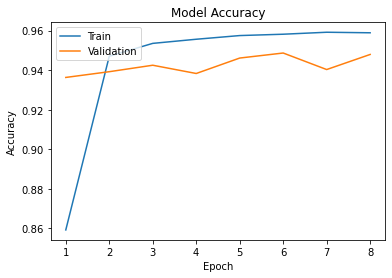

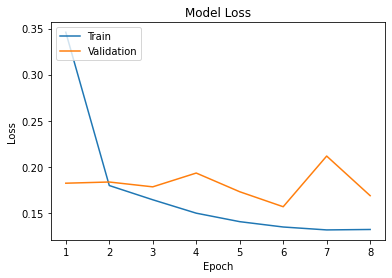

In [15]:
plotLearningCurve(history,8)